<a href="https://colab.research.google.com/github/smitpatel201/IntroToMachineLearning/blob/main/HW4_Smit_Patel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Question 1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.metrics import log_loss, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score
file_path = '/content/drive/My Drive/Colab Notebooks/cancer.csv'
cancer1 = pd.DataFrame(pd.read_csv(file_path))

In [3]:
x = cancer1.iloc[:,2:32].values  #Features
y = cancer1.iloc[:,1].values  #Target
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0) #80% - 20% split
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)
# Initialize variables for storing results
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
results = {}
optimum_values = {
    'kernel': '',
    'n_components': 0,
    'accuracy': 0
}

In [4]:
for kernel in kernels:
    results[kernel] = {'accuracy': [], 'precision': [], 'recall': []}

In [5]:
# Perform PCA and SVM classification
for n_components in range(1, X_train.shape[1] + 1):
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train_sc)
    X_test_pca = pca.transform(X_test_sc)
    for kernel in kernels:
        # Train SVM Classifier
        svm = SVC(kernel=kernel)
        svm.fit(X_train_pca, y_train)

        # Make predictions
        y_pred = svm.predict(X_test_pca)

        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, pos_label='M')
        recall = recall_score(y_test, y_pred, pos_label='M')


        # Store results
        results[kernel]['accuracy'].append(accuracy)
        results[kernel]['precision'].append(precision)
        results[kernel]['recall'].append(recall)

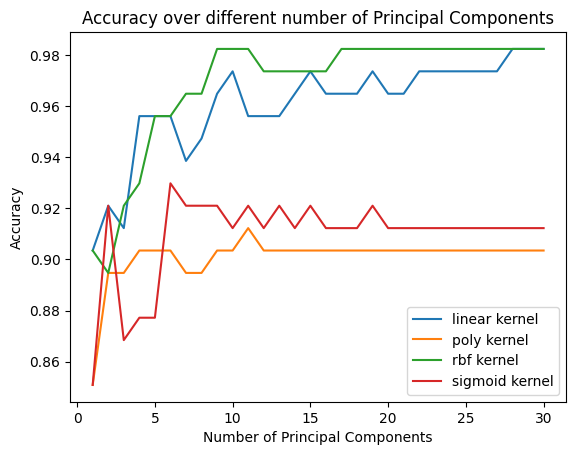

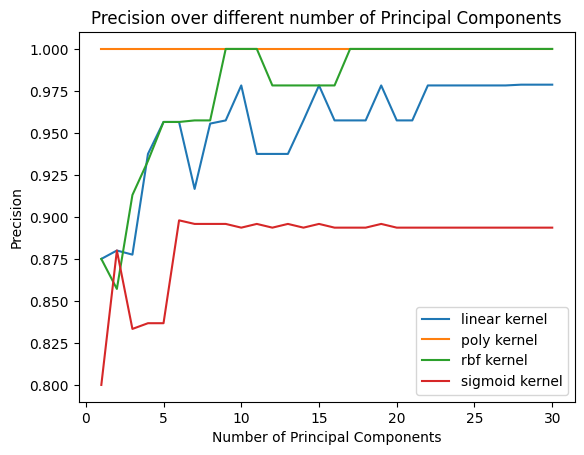

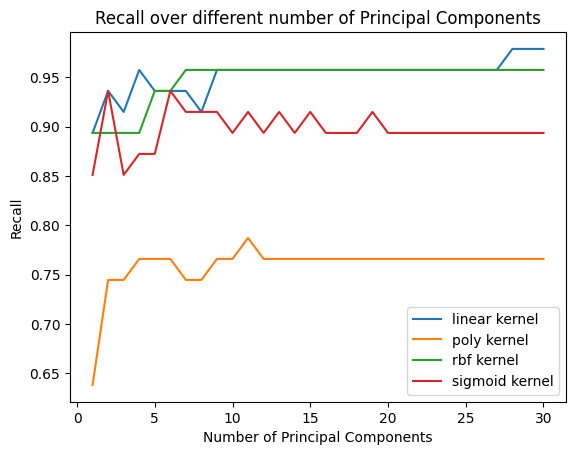

In [6]:
# Plotting the results
for metric in ['accuracy', 'precision', 'recall']:
    plt.figure()
    plt.title(f'{metric.capitalize()} over different number of Principal Components')
    for kernel in kernels:
        plt.plot(range(1, X_train.shape[1] + 1), results[kernel][metric], label=f'{kernel} kernel')
    plt.xlabel('Number of Principal Components')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.show()

In [7]:
cum_var_exp = np.cumsum(pca.explained_variance_ratio_)
K_optimal = np.where(cum_var_exp >= 0.95)[0][0] + 1

print(f"Optimal number of components for 95% explained variance: {K_optimal}")

Optimal number of components for 95% explained variance: 10


Accuracy for linear kernel: 0.95


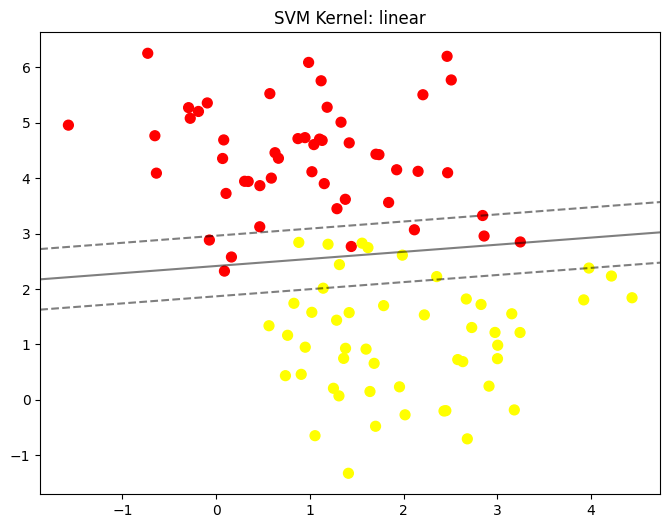

In [17]:
from sklearn.svm import SVC
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np  # Required for numerical calculations for the meshgrid

# Generate blobs of data with 2 centers
Xc_train, Yc_train = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=1.0)

# Fit the SVC with a linear kernel
clf = SVC(kernel='linear').fit(Xc_train, Yc_train)

# Calculate the accuracy
accuracy = clf.score(Xc_train, Yc_train)
print(f"Accuracy for linear kernel: {accuracy}")

# Plot the blobs
plt.figure(figsize=(8, 6))
plt.scatter(Xc_train[:, 0], Xc_train[:, 1], c=Yc_train, cmap='autumn', s=50)  # Use the 'autumn' colormap
plt.title('SVM Kernel: linear')

# Define the function to plot the decision boundary without support vectors
def plot_svc_decision_function(model, ax=None, plot_support=False):  # Set plot_support to False
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # Plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

# Plot the decision function without the support vectors
plot_svc_decision_function(clf, plot_support=False)  # Ensure plot_support is set to False

# Show the plot
plt.show()


Accuracy for poly kernel: 0.94


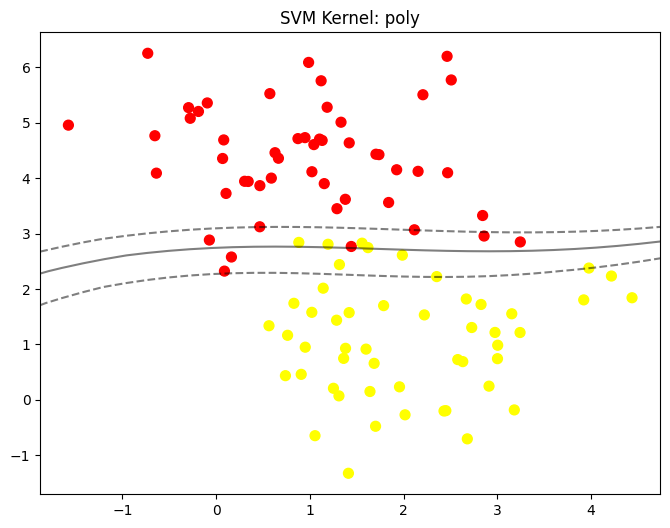

In [18]:
from sklearn.svm import SVC
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np  # Required for numerical calculations for the meshgrid

# Generate blobs of data with 2 centers
Xc_train, Yc_train = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=1.0)

# Fit the SVC with a polynomial kernel
clf = SVC(kernel='poly').fit(Xc_train, Yc_train)

# Calculate the accuracy
accuracy = clf.score(Xc_train, Yc_train)
print(f"Accuracy for poly kernel: {accuracy}")

# Plot the blobs
plt.figure(figsize=(8, 6))
plt.scatter(Xc_train[:, 0], Xc_train[:, 1], c=Yc_train, cmap='autumn', s=50)  # Use the 'autumn' colormap
plt.title('SVM Kernel: poly')

# Define the function to plot the decision boundary without support vectors
def plot_svc_decision_function(model, ax=None, plot_support=False):  # Set plot_support to False
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # Plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

# Plot the decision function without the support vectors
plot_svc_decision_function(clf)

# Show the plot
plt.show()


Accuracy for rbf kernel: 0.96


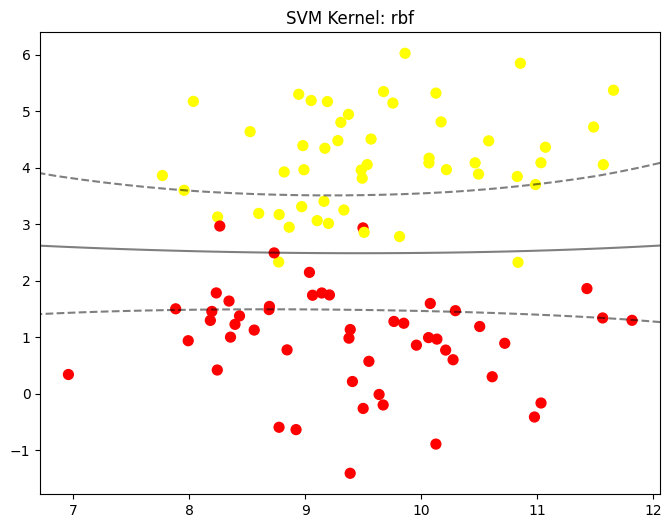

In [22]:
from sklearn.svm import SVC
from sklearn.datasets import make_blobs
Xc_train, Yc_train = make_blobs(n_samples=100, centers=2, random_state=4, cluster_std=1.0)
clf = SVC(kernel='rbf').fit(Xc_train,Yc_train)
accuracy = clf.score(Xc_train, Yc_train)
print(f"Accuracy for rbf kernel: {accuracy}")
plt.figure(figsize=(8,6))
plt.scatter(Xc_train[:,0], Xc_train[:,1], c=Yc_train, s=50, cmap='autumn');
plt.title(label=f'SVM Kernel: rbf')
plot_svc_decision_function(clf, plot_support=False);

Accuracy for sigmoid kernel: 0.53


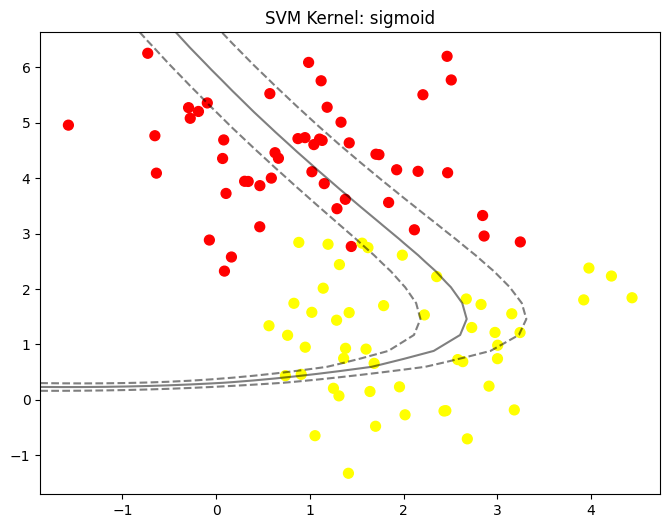

In [23]:
from sklearn.svm import SVC
from sklearn.datasets import make_blobs
Xc_train, Yc_train = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=1.0)
clf = SVC(kernel='sigmoid').fit(Xc_train,Yc_train)
accuracy = clf.score(Xc_train, Yc_train)
print(f"Accuracy for sigmoid kernel: {accuracy}")
plt.figure(figsize=(8,6))
plt.scatter(Xc_train[:,0], Xc_train[:,1], c=Yc_train, s=50, cmap='autumn');
plt.title(label=f'SVM Kernel: sigmoid')
plot_svc_decision_function(clf, plot_support=False);

NameError: ignored

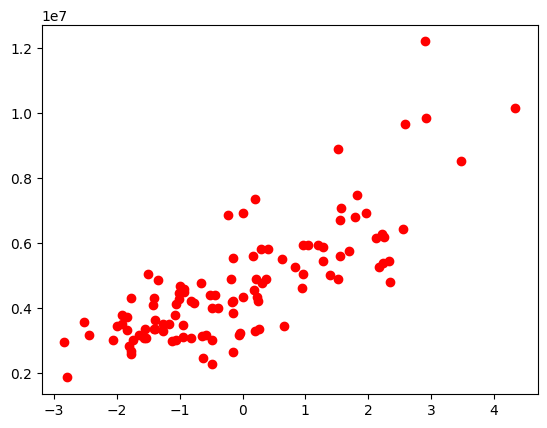

In [24]:
# Question 2

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load your dataset
file_path = '/content/drive/My Drive/Colab Notebooks/Housing.csv'
housing = pd.read_csv(file_path)

# Map binary categorical variables to 1 and 0
varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
housing[varlist] = housing[varlist].apply(lambda x: x.map({'yes': 1, 'no': 0}))

# Split data into features (X) and target variable (y)
X = housing[['area', 'bedrooms', 'bathrooms', 'stories'] + varlist]
y = housing['price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# Standardize the data using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Perform PCA with only the first principal component
n_components = 1
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
lw = 0.01

plt.scatter(X_test_pca[:, 0], y_test, color='red', label='Data')
plt.plot(X_test_pca[:, 0], y_rbf, color='green', label='RBF model')
plt.plot(X_test_pca[:, 0], y_lin, color='y', label='Linear model')
plt.plot(X_test_pca[:, 0], y_poly, color='blue', label='Polynomial model')
plt.xlabel('First Principal Component')
plt.ylabel('Price')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

# Initialize the list of kernel types
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
mse_results = {}

# Loop over different kernel types
for kernel in kernels:
    # Train SVR model
    svr = SVR(kernel=kernel, C=1e3)
    if kernel == 'poly':
        svr.degree = 2
    svr.fit(X_train_pca, y_train)
    y_pred = svr.predict(X_test_pca)
    mse = mean_squared_error(y_test, y_pred)

    # Store the results for this kernel type
    mse_results[kernel] = {'Lowest_MSE': mse}



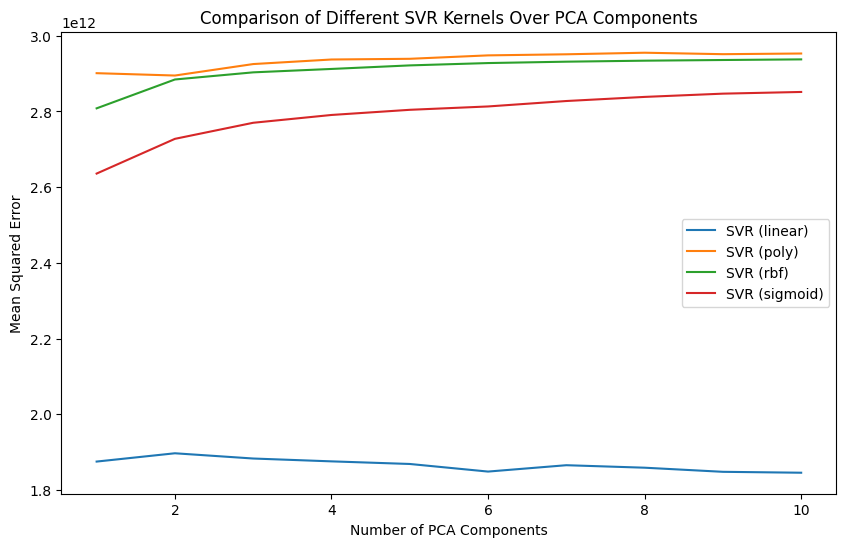

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load your dataset
file_path = '/content/drive/My Drive/Colab Notebooks/Housing.csv'
housing = pd.read_csv(file_path)

# Map binary categorical variables to 1 and 0
varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
housing[varlist] = housing[varlist].apply(lambda x: x.map({'yes': 1, 'no': 0}))

# Split data into features (X) and target variable (y)
X = housing[['area', 'bedrooms', 'bathrooms', 'stories'] + varlist]
y = housing['price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standardize the data using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the list of kernel types
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Initialize a dictionary to store MSE for each kernel and each number of components
mse_results = {kernel: [] for kernel in kernels}

# Loop over different kernel types
for kernel in kernels:
    # Loop over different numbers of principal components
    for K in range(1, X_train.shape[1] + 1):
        # Apply PCA
        pca = PCA(n_components=K)
        X_train_pca = pca.fit_transform(X_train)
        X_test_pca = pca.transform(X_test)

        # Train SVR model
        svr = SVR(kernel=kernel, C=1e3)
        if kernel == 'poly':
            svr.degree = 2
        svr.fit(X_train_pca, y_train)
        y_pred = svr.predict(X_test_pca)
        mse = mean_squared_error(y_test, y_pred)

        # Store the MSE for this kernel and number of components
        mse_results[kernel].append(mse)

# Plot the results
plt.figure(figsize=(10, 6))
for kernel in kernels:
    plt.plot(range(1, X_train.shape[1] + 1), mse_results[kernel], label=f'SVR ({kernel})')

plt.xlabel('Number of PCA Components')
plt.ylabel('Mean Squared Error')
plt.title('Comparison of Different SVR Kernels Over PCA Components')
plt.legend()
plt.show()